In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt


In [2]:
import pandas as pd
data=pd.read_csv('food1.csv')
print(data)
print(data.info())

    Ingredient  Sweetness  Crunchiness   FoodType
0        apple         10            9      fruit
1        bacon          1            4    protein
2       banana         10            1      fruit
3       carrot          7           10  vegetable
4       celery          3           10  vegetable
5       cheese          1            1    protein
6     cucumber          2            8  vegetable
7         fish          3            1    protein
8        grape          8            5      fruit
9   green bean          3            7  vegetable
10     lettuce          1            9  vegetable
11        nuts          3            6    protein
12      orange          7            3      fruit
13        pear         10            7      fruit
14      shrimp          2            3    protein
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ingredient 

In [3]:
print(data.head(5))

  Ingredient  Sweetness  Crunchiness   FoodType
0      apple         10            9      fruit
1      bacon          1            4    protein
2     banana         10            1      fruit
3     carrot          7           10  vegetable
4     celery          3           10  vegetable


In [4]:
print(data.describe())

       Sweetness  Crunchiness
count  15.000000    15.000000
mean    4.733333     5.600000
std     3.514595     3.290679
min     1.000000     1.000000
25%     2.000000     3.000000
50%     3.000000     6.000000
75%     7.500000     8.500000
max    10.000000    10.000000


In [5]:
x=data.iloc[:,1:3].values
print(x)
y=data.iloc[:,3].values
print(y)

[[10  9]
 [ 1  4]
 [10  1]
 [ 7 10]
 [ 3 10]
 [ 1  1]
 [ 2  8]
 [ 3  1]
 [ 8  5]
 [ 3  7]
 [ 1  9]
 [ 3  6]
 [ 7  3]
 [10  7]
 [ 2  3]]
['fruit' 'protein' 'fruit' 'vegetable' 'vegetable' 'protein' 'vegetable'
 'protein' 'fruit' 'vegetable' 'vegetable' 'protein' 'fruit' 'fruit'
 'protein']


In [7]:
le=LabelEncoder()
y_new=le.fit_transform(y)
print(y_new)

[0 1 0 2 2 1 2 1 0 2 2 1 0 0 1]


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y_new,test_size=.25,random_state=30)
print(y_test)

[0 2 1 0]


In [13]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
print("----------------------test class-----------\n",y_test)
print("----------------------predict class-----------\n",y_predict)


----------------------test class-----------
 [0 2 1 0]
----------------------predict class-----------
 [2 2 2 0]


In [14]:
print(knn.predict_proba(x_test))

[[0.4 0.  0.6]
 [0.  0.2 0.8]
 [0.  0.4 0.6]
 [0.6 0.4 0. ]]


In [16]:
print(accuracy_score(y_test,y_predict,normalize=False))

2


[[1 0 1]
 [0 0 1]
 [0 0 1]]


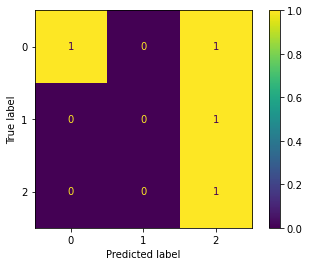

In [18]:
cm=confusion_matrix(y_test,y_predict,normalize=None,labels=knn.classes_)
print(cm)
cm_dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
cm_dis.plot()
plt.show()